In [70]:
import pandas as pd

In [71]:
#load data
data=pd.read_csv("marketing-data.csv")

In [72]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [73]:
data.columns.values
data.shape
#bank.dtypes

(45211, 17)

In [74]:
# convert the response to numeric values and store as a new column
data1=data.copy()
data1['outcome'] = data1.is_success.map({'no':0, 'yes':1})

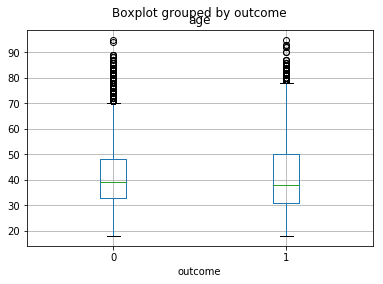

In [75]:
%matplotlib inline

# maybe not a great feature
data1.boxplot(column='age', by='outcome')

In [76]:
from sklearn import preprocessing

# Variables
var_names = data.columns.tolist()

# Categorical variables
categs = ['job','marital','education','default','housing','loan','contact','month','day','poutcome','is_success']
# Quantitative variables
quantit = [i for i in var_names if i not in categs]
print(quantit)

# Map variable to predict
dict_map = dict()
y_map = {'yes':1,'no':0}
dict_map['is_success'] = y_map
data = data.replace(dict_map)
label = data['is_success']

#df1 = data[quantit]
#df1_names = df1.keys().tolist()


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#splitting of data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(data[quantit], label, random_state=0)

#scaling of data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_final=scaler.transform(data[quantit])

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [77]:
# use of knn
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn.score(X_test_scaled, y_test)))


knn2 = KNeighborsClassifier(n_neighbors = 7)
knn2.fit(X_final, label)
print('Accuracy of K-NN classifier on complete set: {:.4f}'
     .format(knn2.score(X_final, label)))

Accuracy of K-NN classifier on training set: 0.9090
Accuracy of K-NN classifier on test set: 0.8873
Accuracy of K-NN classifier on complete set: 0.9093


In [78]:
#cross validation technique
from sklearn.cross_validation import cross_val_score

k_range=[1,3,5,7,9,11,15,19]
k_scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores=cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring="accuracy")
    k_scores.append(scores.mean())
print(k_scores)

[0.85307369065508998, 0.87640182348193907, 0.88507169393888796, 0.88701830091278455, 0.88872857182612575, 0.88999662575833471, 0.89164817790950068, 0.89058661365280789]


In [79]:
from sklearn.cross_validation import cross_val_score

knn1=KNeighborsClassifier(n_neighbors = 7)
scores=cross_val_score(knn1, X_train_scaled, y_train, cv=10, scoring="accuracy")
print(scores)
print(scores.mean())

[ 0.87971698  0.88561321  0.88679245  0.88767689  0.88259587  0.89380531
  0.89174041  0.88672566  0.88967552  0.88584071]
0.887018300913


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg=LogisticRegression()
logreg.fit(X_train_scaled, y_train)
print('Accuracy of linear classifier on training set: {:.4f}'
     .format(logreg.score(X_train_scaled, y_train)))
print('Accuracy of linear classifier on test set: {:.4f}'
     .format(logreg.score(X_test_scaled, y_test)))

print("Coefficients of binary classifier of quantitative values",quantit,logreg.coef_)

logreg1=LogisticRegression()
logreg1.fit(X_train_scaled, y_train)
print('Accuracy of linear binary classifier on complete set: {:.4f}'
     .format(logreg1.score(X_final, label)))

Accuracy of linear classifier on training set: 0.8891
Accuracy of linear classifier on test set: 0.8883
Coefficients of binary classifier of quantitative values ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'] [[  0.53178991   3.35094975  16.24342052  -5.64846225   2.30263619
    3.29348039]]
Accuracy of linear binary classifier on complete set: 0.8889


In [81]:
#crosss validation
scores1=cross_val_score(logreg, X_train_scaled, y_train, cv=10, scoring="accuracy")
print(scores1)
print(scores1.mean())

[ 0.88413915  0.89209906  0.88590802  0.88915094  0.88554572  0.8840708
  0.8899705   0.8920354   0.89174041  0.89410029]
0.888876029665


In [82]:
#SVM
from sklearn.svm import SVC

this_C = 1.0
clf = SVC(C=this_C).fit(X_train_scaled, y_train)
print('Accuracy of Linear SVC classifier on training set: {:.4f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.4f}'
     .format(clf.score(X_test_scaled, y_test)))

clf = SVC(C=this_C).fit(X_final, label)
print('Accuracy of Linear SVC classifier on complete set: {:.4f}'
     .format(clf.score(X_final, label)))

Accuracy of Linear SVC classifier on training set: 0.8831
Accuracy of Linear SVC classifier on test set: 0.8828
Accuracy of Linear SVC classifier on complete set: 0.8830


In [83]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.4f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.4f}'
     .format(clf.score(X_test_scaled, y_test)))

clf1 = DecisionTreeClassifier().fit(X_final, label)

print('Accuracy of Decision Tree classifier on complete set: {:.4f}'
     .format(clf.score(X_final, label)))

Accuracy of Decision Tree classifier on training set: 0.9999
Accuracy of Decision Tree classifier on test set: 0.8489
Accuracy of Decision Tree classifier on complete set: 0.9621


In [84]:
#Decision tree to minimize overfitting
clf2 = DecisionTreeClassifier(max_depth = 10).fit(X_train_scaled, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.4f}'
     .format(clf2.score(X_train_scaled, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.4f}'
     .format(clf2.score(X_test_scaled, y_test)))

clf3 = DecisionTreeClassifier(max_depth = 10).fit(X_final, label)

print('Accuracy of Decision Tree classifier on complete set: {:.4f}'
     .format(clf2.score(X_final, label)))

Accuracy of Decision Tree classifier on training set: 0.9182
Accuracy of Decision Tree classifier on test set: 0.8874
Accuracy of Decision Tree classifier on complete set: 0.9105


In [85]:
#random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_features = 3, n_estimators=40, max_depth=10)
clf.fit(X_train_scaled, y_train)


print('Accuracy of RF classifier on training set: {:.4f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of RF classifier on test set: {:.4f}'
     .format(clf.score(X_test_scaled, y_test)))

clf.fit(X_final, label)


print('Accuracy of RF classifier on complete set: {:.4f}'
     .format(clf.score(X_final, label)))

Accuracy of RF classifier on training set: 0.9249
Accuracy of RF classifier on test set: 0.8936
Accuracy of RF classifier on complete set: 0.9201
